# Data Analysis


## Imports

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

## Loading the data

In [112]:
data = pd.read_csv('../raw_data/dengue_features_train.csv')
labels = pd.read_csv('../raw_data/dengue_labels_train.csv')
data = data.merge(labels)
print(data.shape)

(1456, 25)


In [113]:
#Splitting data for each city (San Juan, Puerto Rico & Iquitos, Peru)
data_sj = data.iloc[:936,:]
data_iq = data.iloc[936:,:]

In [114]:
print(data_iq.shape,data_sj.shape)

(520, 25) (936, 25)


In [115]:
data_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [116]:
data_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


## Basic data preparation and visualizations

In [117]:
#NaN counts for each column in the San Juan data
data_sj.isnull().sum().sort_values(ascending=False)

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_sat_precip_amt_mm               9
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_tdtr_k                          6
reanalysis_specific_humidity_g_per_kg      6
reanalysis_relative_humidity_percent       6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_avg_temp_k                      6
station_max_temp_c                         6
reanalysis_dew_point_temp_k                6
station_diur_temp_rng_c                    6
reanalysis_air_temp_k                      6
station_min_temp_c                         6
station_precip_mm                          6
station_avg_temp_c                         6
city                                       0
year                                       0
week_start

In [118]:
#NaN counts for each column in the Iquitos data
data_iq.isnull().sum().sort_values(ascending=False)

station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_precip_mm                        16
station_max_temp_c                       14
station_min_temp_c                        8
reanalysis_tdtr_k                         4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_sat_precip_amt_mm              4
reanalysis_relative_humidity_percent      4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_min_air_temp_k                 4
reanalysis_max_air_temp_k                 4
reanalysis_dew_point_temp_k               4
reanalysis_air_temp_k                     4
precipitation_amt_mm                      4
reanalysis_avg_temp_k                     4
ndvi_sw                                   3
ndvi_se                                   3
ndvi_nw                                   3
ndvi_ne                                   3
city                                      0
year                                      0
week_start_date                 

These NaN values will be replaced through linear interpolation in order to best retain the patterns in the data over time.

In [119]:
data_sj = data_sj.interpolate(method='linear')
data_iq = data_iq.interpolate(method='linear')

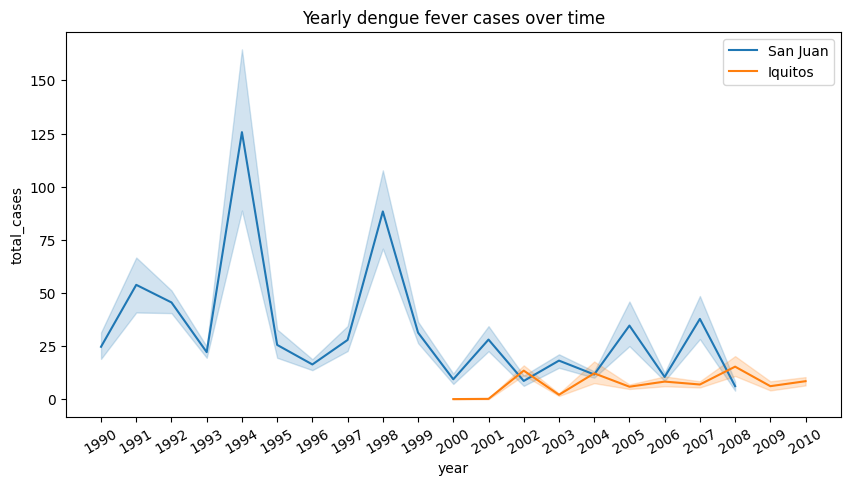

In [120]:
#Plotting yearly cases over time
plt.figure(figsize=(10, 5))
plt.title('Yearly dengue fever cases over time')
sns.lineplot(data=data_sj,x='year',y='total_cases',label='San Juan')
sns.lineplot(data=data_iq,x='year',y='total_cases',label='Iquitos')
plt.xticks(np.arange(1990, 2011, step=1),rotation=30)
plt.legend()
plt.show;

We see higher yearly cases in the 90's in San Juan and less yearly cases in the more recent data. Perhaps this is a result of urbanization and thus less vegetation in the city or it could be caused by exogenous factors such as development of housing and use of mosquito nets.

The NDVI (Normalized Difference Vegetation Index) is an estimate of the density of green on an area of land, derived from satellite images. Plotting this measure over time could show us whether it may have played a role.

In [121]:
sj_ndvis = data_sj.loc[:,['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
iq_ndvis = data_iq.loc[:,['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
data_sj.loc[:,'avg_ndvi'] = sj_ndvis.mean(axis=1)
data_iq.loc[:,'avg_ndvi'] = iq_ndvis.mean(axis=1)

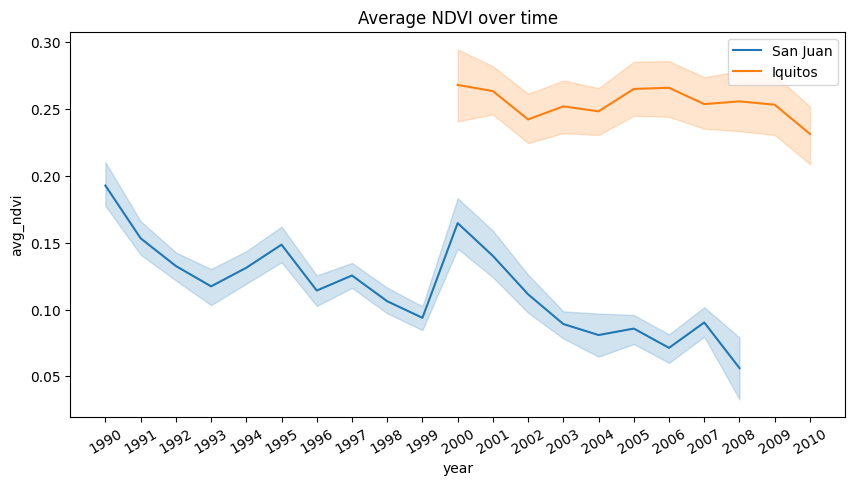

In [122]:
#Plotting yearly vegetation index over time.
plt.figure(figsize=(10, 5))
plt.title('Average NDVI over time')
sns.lineplot(data=data_sj,x='year',y='avg_ndvi',label='San Juan')
sns.lineplot(data=data_iq,x='year',y='avg_ndvi',label='Iquitos')
plt.xticks(np.arange(1990, 2011, step=1),rotation=30)
plt.legend()
plt.show;

From this visualization we can see that the vegetation density has decreased in San Juan and slightly in Iquitos over time. We can also see that San Juan appears to be more urban than Iquitos since it's average NDVI is lower. This could affect the behavior of the Dengue virus in both locations.

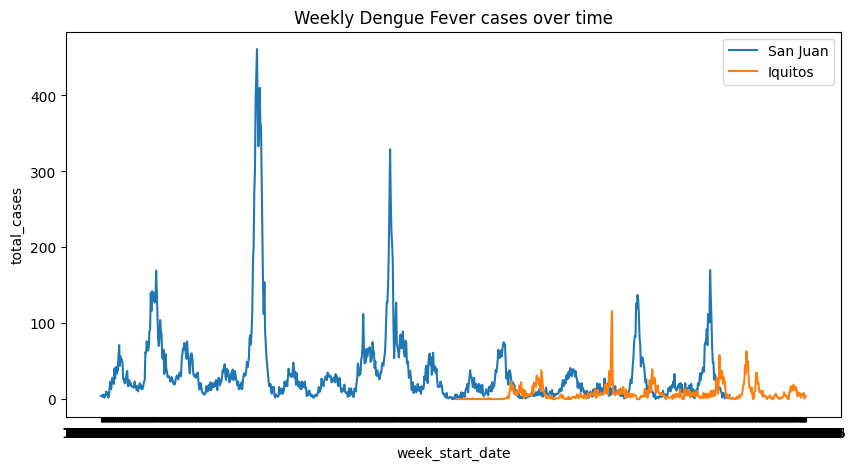

In [123]:
plt.figure(figsize=(10, 5))
plt.title('Weekly Dengue Fever cases over time')
sns.lineplot(data=data_sj,x='week_start_date',y='total_cases',label='San Juan')
sns.lineplot(data=data_iq,x='week_start_date',y='total_cases',label='Iquitos')
plt.legend()
plt.show;

Visually it looks like our data has high seasonality, but remains relatively stationary over time. We can confirm the stationarity with an Augmented Dickey Fuller test, testing the following null hypothesis: the series is not-stationary. A p-value close to 0 will indicate stationarity.

In [124]:
print('P-value for San Juan:')
adfuller(data_sj['total_cases'])[1]

P-value for San Juan:


5.1473186737591e-09

In [125]:
print('P-value for Iquitos:')
adfuller(data_iq['total_cases'])[1]

P-value for Iquitos:


1.0672522948401663e-07

This confirms our assumption about the stationarity of the data. Next let's have a look at the seasonality.

In [126]:
#Aggregating monthly cases for each city
data_iq['month'] = pd.DatetimeIndex(data_iq['week_start_date']).month
data_sj['month'] = pd.DatetimeIndex(data_sj['week_start_date']).month

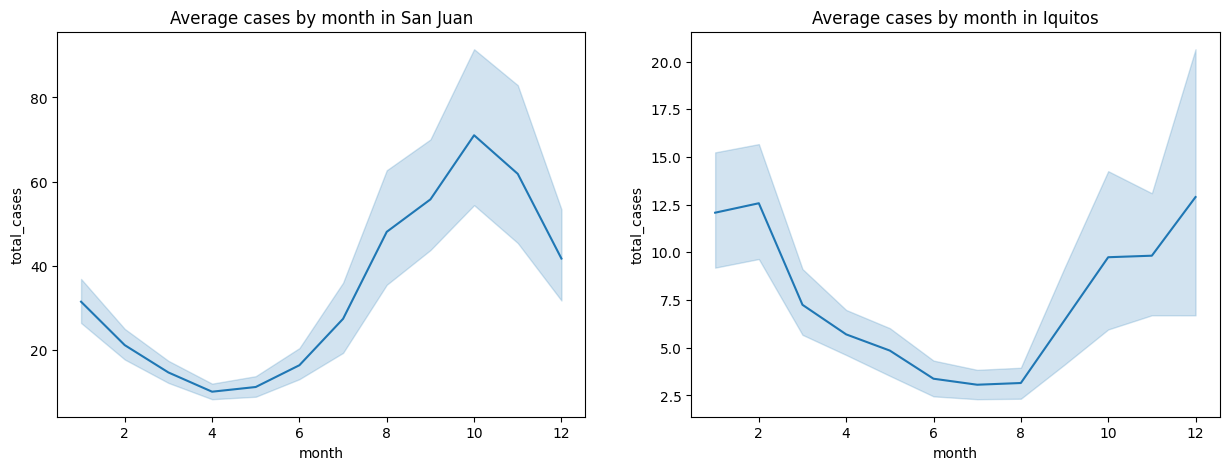

In [127]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('Average cases by month in San Juan')
sns.lineplot(data=data_sj,x='month',y='total_cases')
plt.show;
plt.subplot(122)
plt.title('Average cases by month in Iquitos')
sns.lineplot(data=data_iq,x='month',y='total_cases')
plt.show;

The cases in San Juan dip in the dryer months of February to August and then rise as hurricane season occurs between late August and October. The peak cases tend to occur in October, towards the end of hurricane season, when it has been more rainy.

In Iquitos rainy season usually occurs from December to April, which roughly correlates to the increase in cases we tend to see from October to March in the Iquitos data set.

## A look at correlations

In [128]:
data_iq = data_iq.drop(columns=['city','year','weekofyear', 'week_start_date','month','avg_ndvi'])
data_sj = data_sj.drop(columns=['city','year','weekofyear', 'week_start_date','month','avg_ndvi'])

In [129]:
#Compute the correlations between features
sj_correlations = data_sj.corr(numeric_only=True)
iq_correlations = data_iq.corr(numeric_only=True)

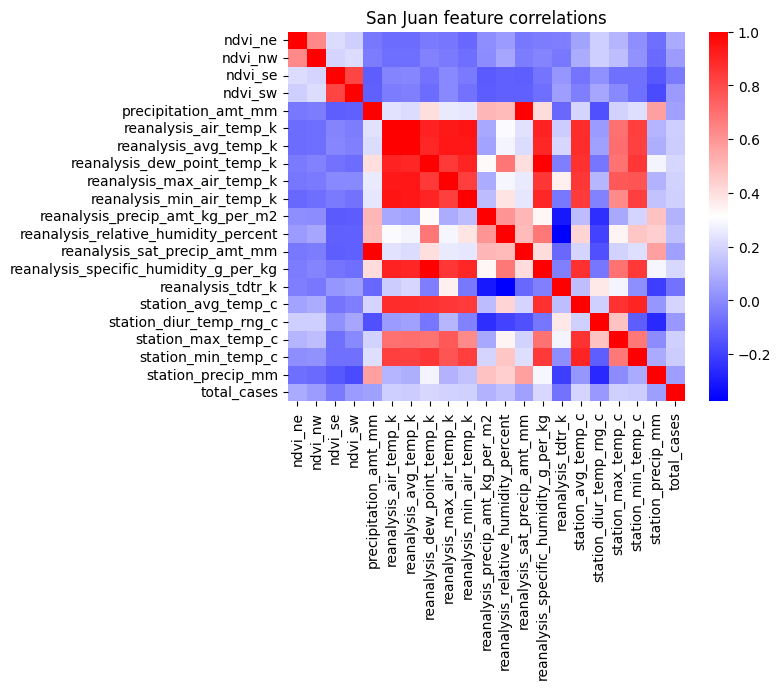

In [130]:
#Plot San Juan correlation heatmap
sj_heatmap = sns.heatmap(sj_correlations,cmap= "bwr")
plt.title('San Juan feature correlations');

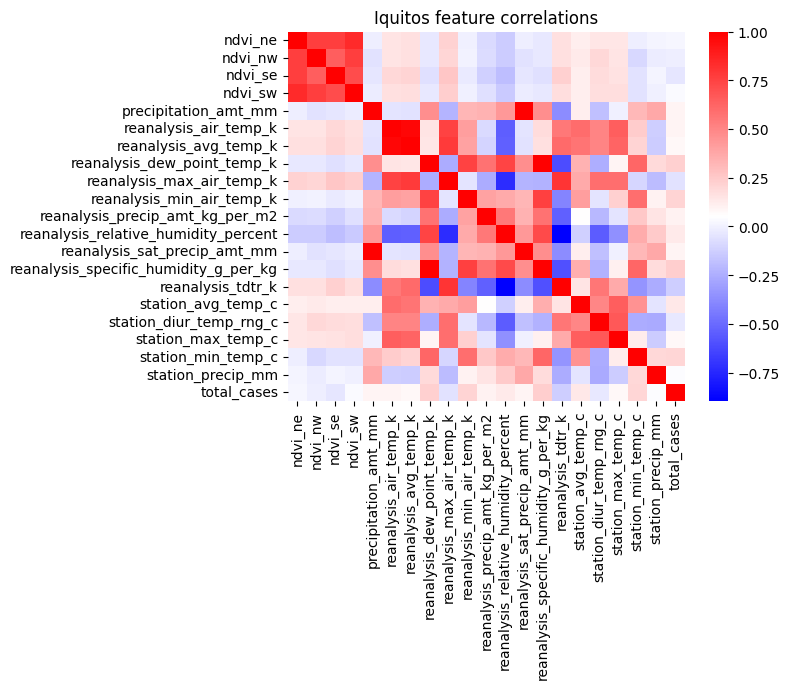

In [131]:
#Plot Iquitos correlation heatmap
iq_corr_heat = sns.heatmap(iq_correlations,cmap= "bwr")
plt.title('Iquitos feature correlations');

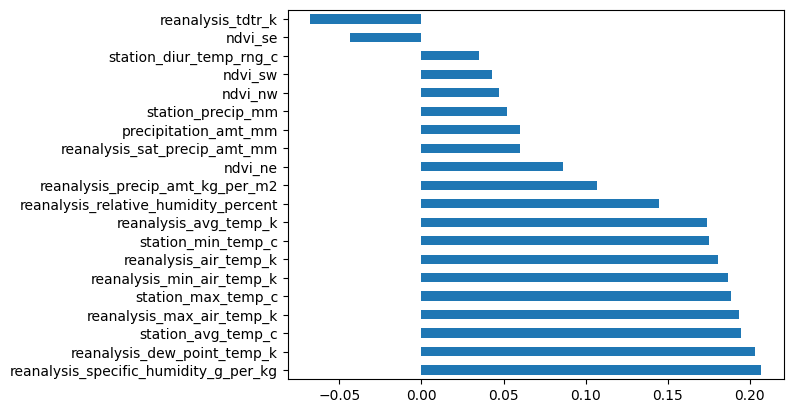

In [132]:
#Finding which features are most correlated with our target, Total Cases
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with itself
     .sort_values(ascending=False)
     .plot
     .barh());

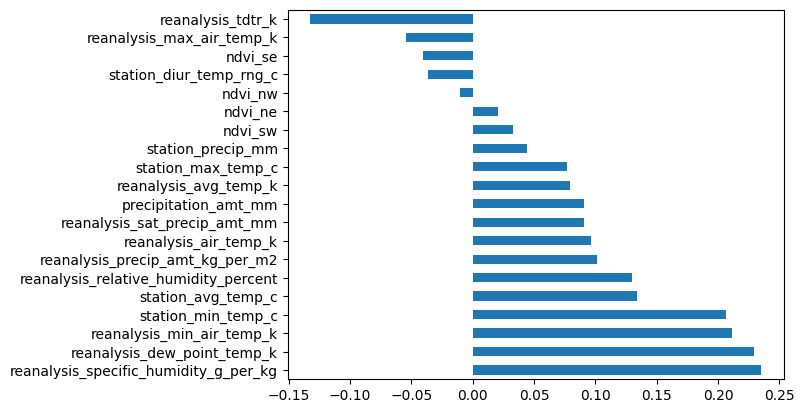

In [133]:
#Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with itself
     .sort_values(ascending=False)
     .plot
     .barh());

First we see that the reanalysis tdtr is the most negatively correlated feature for both cities. This feature describes the diurnal temperature range, the range between temperatures at night and during the day. A higher range may be a more difficult environment for mosquitoes to survive in. 

Next we see that the highest correlated features with dengue fever cases is the humidity and dew point temperature for both cities. This makes sense as mosquitoes thrive in hot and humid climates.  